In [1]:
from tensorflow.keras.datasets import imdb
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=500)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
print(X_train.shape,X_test.shape)

(25000,) (25000,)


In [3]:
print(len(X_train[0]))  # 훈련데이터 첫번째 리뷰길이

218


In [4]:
print(X_train[0])  # 훈련데이터 첫번째 리뷰길이의 단어구성 

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [6]:
import numpy as np
lengths = np.array([len(x) for x in X_train])   # X_train 각 원소들의 리뷰 길이
lengths

array([259, 520, 290, ..., 300,  70,  77])

In [7]:
print(np.mean(lengths),np.median(lengths))   # 평균 239  /  중앙값 178

239.00925 178.0


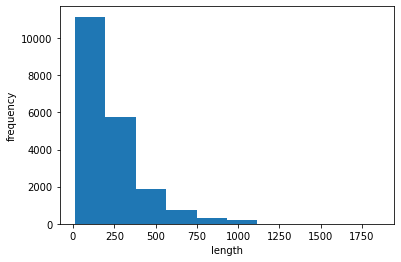

In [8]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()
# 대부분 700언저리인것 확인 --> maxlen 단위는 알아서 조정해보자

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(X_train,maxlen=100)   # 훈련용 데이터셋의 모든 길이를 100으로 맞춰줌   + 만약 100보다 짧은 리뷰는 앞또는 뒤에 패딩값 0 분배
print(train_seq.shape)

(20000, 100)


In [10]:
print(train_seq[0])  # pad_sequences는 maxlen보다 긴 시퀀스의 앞부분을 자른다(일반적으로 뒷부분이 더 유용하다고 생각하므로!)
# 뒷부분 자르려면? --> pad_sequences(truncating='post')

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [11]:
val_seq = pad_sequences(X_valid,maxlen=100)

In [12]:
from tensorflow.keras import *
from tensorflow.keras.layers import *
model = Sequential()
model.add(SimpleRNN(8,activation='tanh',input_shape=(100,500)))
model.add(Dense(1,activation='sigmoid'))

## one-hot-encoding으로 단어 구분
* train_seq를 모델에 넣으면 큰 숫자가 큰 활성화 출력을 내므로 one-hot encoding해야함
* keras의 one-hot-coding => to_categorical()

In [13]:
train_oh = utils.to_categorical(train_seq)
train_oh

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]],

       [[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0.

In [14]:
train_oh.shape   # 500차원의 (20000,100) 데이터 형성
# 왜 500차원? -->  num_words = 500 이었으므로 train_seq에 들어있는 최대값도 500이었을것이기 때문에!

(20000, 100, 500)

In [15]:
np.sum(train_oh[0][0])

1.0

In [16]:
val_oh = utils.to_categorical(val_seq)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [18]:
rms_prop = optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rms_prop,loss='binary_crossentropy',metrics=['acc'])
es = callbacks.EarlyStopping(patience=4,restore_best_weights=True)
cp = callbacks.ModelCheckpoint('best-simplernn-model.h5')
history = model.fit(train_oh,y_train,epochs=100,batch_size=64,validation_data=(val_oh,y_valid),
                    callbacks=[es,cp])

Epoch 1/100
313/313 [==============================] - 38s 109ms/step - loss: 0.6998 - acc: 0.4967 - val_loss: 0.6957 - val_acc: 0.5052
Epoch 2/100
313/313 [==============================] - 34s 109ms/step - loss: 0.6949 - acc: 0.5087 - val_loss: 0.6933 - val_acc: 0.5126
Epoch 3/100
313/313 [==============================] - 33s 105ms/step - loss: 0.6915 - acc: 0.5228 - val_loss: 0.6911 - val_acc: 0.5262
Epoch 4/100
313/313 [==============================] - 33s 105ms/step - loss: 0.6885 - acc: 0.5372 - val_loss: 0.6890 - val_acc: 0.5348
Epoch 5/100
313/313 [==============================] - 33s 106ms/step - loss: 0.6856 - acc: 0.5475 - val_loss: 0.6868 - val_acc: 0.5438
Epoch 6/100
313/313 [==============================] - 32s 103ms/step - loss: 0.6824 - acc: 0.5610 - val_loss: 0.6844 - val_acc: 0.5498
Epoch 7/100
313/313 [==============================] - 32s 104ms/step - loss: 0.6788 - acc: 0.5749 - val_loss: 0.6814 - val_acc: 0.5588
Epoch 8/100
313/313 [===========================

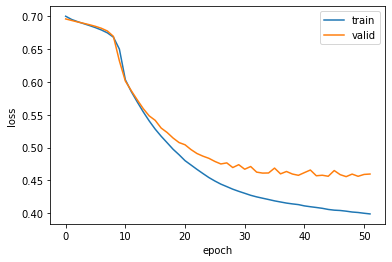

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','valid'])
plt.show()
# patience를 3으로 줄여야 했을까??

## 단어 임베딩 : RNN에서 텍스트 전처리시 자주 쓰는 방법
* 각 단어를 고정된 크기의 실수벡터로 변환 --> 더 좋은 성능 + 메모리 절약

In [20]:
model2 = Sequential()
model2.add(Embedding(500,16,input_length=100))  # 단어 임베딩 
# 500 : 단어사전의 크기 --> 여기서는 이전 num_words=500과 같은 숫자로 설정
# 16 : 임베딩 벡터의 크기 --> one-hot encoding보다 더 작은 숫자로 설정
# input_length : 학습할 데이터인 train_seq의 길이가 100이므로 100 사용
model2.add(SimpleRNN(8,activation='tanh'))
model2.add(Dense(1,activation='sigmoid'))

In [21]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [23]:
rms_prop = optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rms_prop,loss='binary_crossentropy',metrics=['acc'])
es = callbacks.EarlyStopping(patience=4,restore_best_weights=True)
cp = callbacks.ModelCheckpoint('best-embedding-model.h5')
history = model2.fit(train_seq,y_train,epochs=100,batch_size=64,validation_data=(val_seq,y_valid),
                    callbacks=[es,cp])

Epoch 1/100
313/313 [==============================] - 42s 129ms/step - loss: 0.6971 - acc: 0.5059 - val_loss: 0.6933 - val_acc: 0.5166
Epoch 2/100
313/313 [==============================] - 40s 129ms/step - loss: 0.6904 - acc: 0.5297 - val_loss: 0.6897 - val_acc: 0.5356
Epoch 3/100
313/313 [==============================] - 41s 129ms/step - loss: 0.6855 - acc: 0.5527 - val_loss: 0.6871 - val_acc: 0.5416
Epoch 4/100
313/313 [==============================] - 40s 129ms/step - loss: 0.6810 - acc: 0.5677 - val_loss: 0.6847 - val_acc: 0.5466
Epoch 5/100
313/313 [==============================] - 41s 129ms/step - loss: 0.6764 - acc: 0.5854 - val_loss: 0.6822 - val_acc: 0.5554
Epoch 6/100
313/313 [==============================] - 40s 129ms/step - loss: 0.6717 - acc: 0.5986 - val_loss: 0.6803 - val_acc: 0.5590
Epoch 7/100
313/313 [==============================] - 40s 129ms/step - loss: 0.6669 - acc: 0.6096 - val_loss: 0.6785 - val_acc: 0.5634
Epoch 8/100
313/313 [===========================

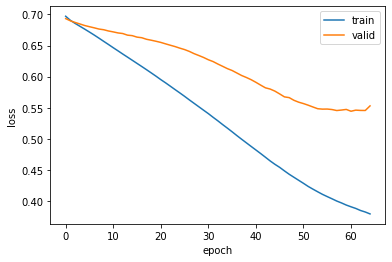

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','valid'])
plt.show()
# 이 모델에선 epochs를 30정도로 주는게 나았을듯!

In [26]:
test_seq = pad_sequences(X_test,maxlen=100) 

In [39]:
embedding_model = models.load_model('best-embedding-model.h5')
embedding_model.evaluate(test_seq,y_test)

782/782 [==============================] - 10s 12ms/step - loss: 0.5388 - acc: 0.7375


[0.5387678742408752, 0.7375199794769287]

# LSTM신경망으로 텍스트 분석
* 원핫인코딩이 아닌 Embedding 사용

In [29]:
model3 = Sequential()
model3.add(Embedding(500,16,input_length=100))
model3.add(LSTM(8))
model3.add(Dense(1,activation='sigmoid'))

In [31]:
rms_prop = optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rms_prop,loss='binary_crossentropy',metrics=['acc'])
cp = callbacks.ModelCheckpoint('best-lstm-model.h5')
es = callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model3.fit(train_seq,y_train,epochs=100,batch_size=64,validation_data=(val_seq,y_valid),
                     callbacks=[cp,es])

Epoch 1/100
313/313 [==============================] - 11s 21ms/step - loss: 0.6912 - acc: 0.5638 - val_loss: 0.6893 - val_acc: 0.5948
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6848 - acc: 0.6346 - val_loss: 0.6793 - val_acc: 0.6488
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6631 - acc: 0.6781 - val_loss: 0.6377 - val_acc: 0.7016
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5778 - acc: 0.7294 - val_loss: 0.5498 - val_acc: 0.7408
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5326 - acc: 0.7514 - val_loss: 0.5260 - val_acc: 0.7524
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5091 - acc: 0.7673 - val_loss: 0.5036 - val_acc: 0.7738
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.4896 - acc: 0.7796 - val_loss: 0.4876 - val_acc: 0.7800
Epoch 8/100
313/313 [==============================] - 6s 20m

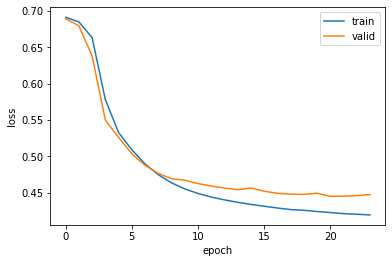

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','valid'])
plt.show()

In [38]:
lstm_model = models.load_model('best-lstm-model.h5')
lstm_model.evaluate(test_seq,y_test)

782/782 [==============================] - 6s 8ms/step - loss: 0.4420 - acc: 0.7934


[0.4419786334037781, 0.7934399843215942]

## GRU 신경망 적용

In [34]:
model4 = Sequential()
model4.add(Embedding(500,16,input_length=100))
model4.add(GRU(8))
model4.add(Dense(1,activation='sigmoid'))

In [35]:
rms_prop = optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rms_prop,loss='binary_crossentropy',metrics=['acc'])
cp = callbacks.ModelCheckpoint('best-gru-model.h5')
es = callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model4.fit(train_seq,y_train,epochs=100,batch_size=64,validation_data=(val_seq,y_valid),
                     callbacks=[cp,es])

Epoch 1/100
313/313 [==============================] - 9s 21ms/step - loss: 0.6927 - acc: 0.5227 - val_loss: 0.6918 - val_acc: 0.5426
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6909 - acc: 0.5574 - val_loss: 0.6898 - val_acc: 0.5618
Epoch 3/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6881 - acc: 0.5864 - val_loss: 0.6863 - val_acc: 0.5914
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6832 - acc: 0.6093 - val_loss: 0.6805 - val_acc: 0.6122
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6748 - acc: 0.6282 - val_loss: 0.6702 - val_acc: 0.6300
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6602 - acc: 0.6477 - val_loss: 0.6524 - val_acc: 0.6512
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6341 - acc: 0.6726 - val_loss: 0.6182 - val_acc: 0.6834
Epoch 8/100
313/313 [==============================] - 6s 20ms

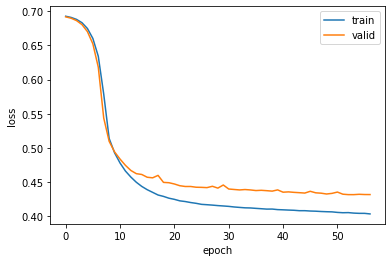

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','valid'])
plt.show()

In [37]:
gru_model = models.load_model('best-gru-model.h5')
gru_model.evaluate(test_seq,y_test)

782/782 [==============================] - 6s 7ms/step - loss: 0.4264 - acc: 0.8006


[0.4263617992401123, 0.8006399869918823]